In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
DataFile = pd.read_csv("Emission.csv")

DataFile.head()

,Year-Month,CO2 Emission
0,1973-Jan,106.363
1,1973-Feb,101.760
2,1973-Mar,110.553
3,1973-Apr,104.734
4,1973-May,114.897


print(DataFile.isnull().sum())

In [4]:
print(DataFile.duplicated().sum())

0


Alright, there are no null values and no duplicates but there is something wrong with the "Year-Month" column, it's better to split it into two

In [6]:
DataFile[['Year', 'Month']] = DataFile['Year-Month'].str.split('-', expand=True)


DataFile.drop(columns=['Year-Month'], inplace=True)

print(DataFile)

     CO2 Emission  Year Month
0         106.363  1973   Jan
1         101.760  1973   Feb
2         110.553  1973   Mar
3         104.734  1973   Apr
4         114.897  1973   May
..            ...   ...   ...
481       134.243  2013   Feb
482       153.078  2013   Mar
483       149.442  2013   Apr
484       156.356  2013   May
485       152.814  2013   Jun

[486 rows x 3 columns]


Now we need to perform visual analysis on our dataset, but first we need to create a csv of our new dataset

In [12]:
DataFile.to_csv("New Emission.csv", index=False)

In [16]:
DataFile = pd.read_csv("New Emission.csv")

DataFile.head()

,CO2 Emission,Year,Month
0,106.363,1973,Jan
1,101.760,1973,Feb
2,110.553,1973,Mar
3,104.734,1973,Apr
4,114.897,1973,May


In [18]:
print(DataFile.isnull().sum())

CO2 Emission    0
Year            0
Month           0
dtype: int64


In [20]:
print(DataFile.duplicated().sum())

0


In [22]:
print(DataFile.dtypes)

CO2 Emission    float64
Year              int64
Month            object
dtype: object


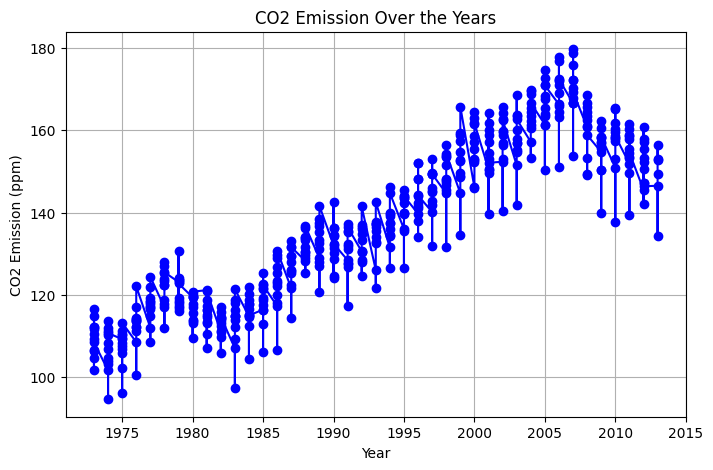

In [26]:
plt.figure(figsize=(8, 5))
plt.plot(DataFile["Year"], DataFile["CO2 Emission"], marker="o", linestyle="-", color="b")

# Labels and Title
plt.xlabel("Year")
plt.ylabel("CO2 Emission (ppm)")
plt.title("CO2 Emission Over the Years")
plt.grid(True)

# Show the plot
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_37248\2886973865.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=DataFile["Month"], y=DataFile["CO2 Emission"], palette="coolwarm")


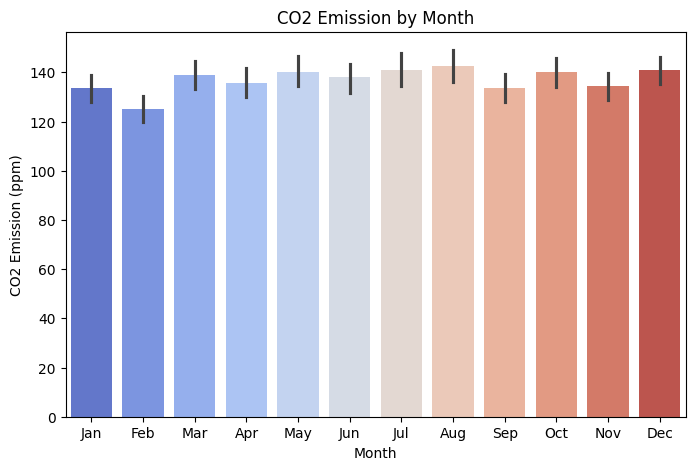

In [31]:
plt.figure(figsize=(8, 5))
sns.barplot(x=DataFile["Month"], y=DataFile["CO2 Emission"], palette="coolwarm")

# Labels and Title
plt.xlabel("Month")
plt.ylabel("CO2 Emission (ppm)")
plt.title("CO2 Emission by Month")

# Show the plot
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_37248\4107821926.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=DataFile["Year"], y=DataFile["CO2 Emission"], palette="coolwarm")


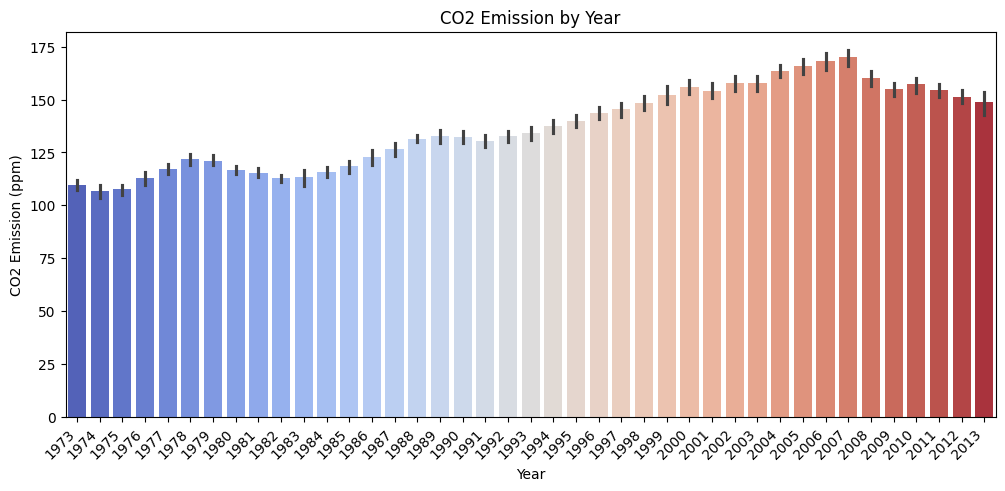

In [50]:
plt.figure(figsize=(12, 5))
sns.barplot(x=DataFile["Year"], y=DataFile["CO2 Emission"], palette="coolwarm")

# Labels and Title
plt.xlabel("Year")
plt.ylabel("CO2 Emission (ppm)")
plt.title("CO2 Emission by Year")

plt.xticks(rotation=45, ha="right")

# Show the plot
plt.show()

It's kind of a complex figure so we will group the years into ranges

In [36]:
min_year = DataFile["Year"].min()
max_year = DataFile["Year"].max()

print(min_year)
print(max_year)

1973
2013


In [38]:
bins = [1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015]

labels = ["1971-1975", "1976-1980", "1981-1985", "1986-1990", "1991-1995", "1996-2000", "2001-2005", "2006-2010", "2011-2015"]

DataFile["Year Range"] = pd.cut(DataFile["Year"], bins=bins, labels=labels, right=True)
print(DataFile[["Year", "Year Range"]].head())

   Year Year Range
0  1973  1971-1975
1  1973  1971-1975
2  1973  1971-1975
3  1973  1971-1975
4  1973  1971-1975


In [40]:
DataFile.head()

,CO2 Emission,Year,Month,Year Range
0,106.363,1973,Jan,1971-1975
1,101.760,1973,Feb,1971-1975
2,110.553,1973,Mar,1971-1975
3,104.734,1973,Apr,1971-1975
4,114.897,1973,May,1971-1975


C:\Users\DELL\AppData\Local\Temp\ipykernel_37248\845639791.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=DataFile["Year Range"], y=DataFile["CO2 Emission"], palette="coolwarm")


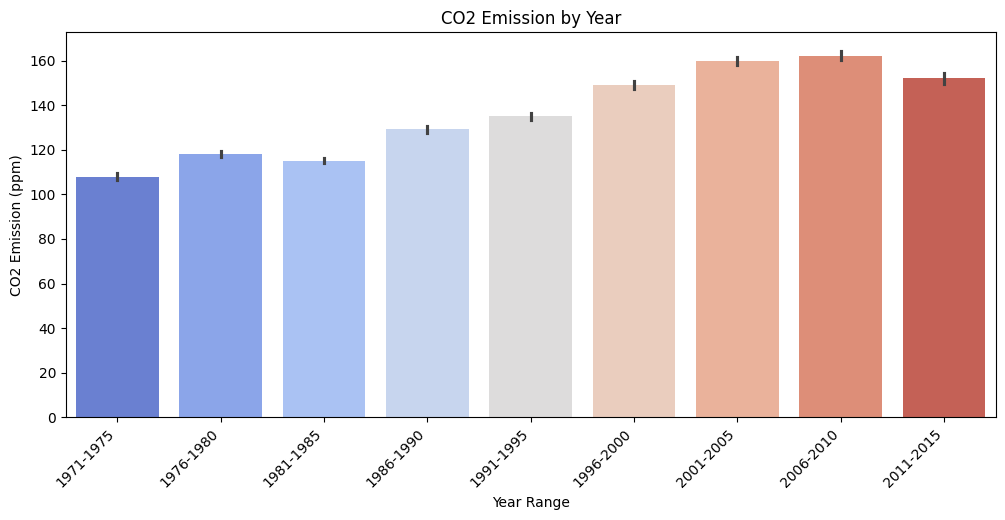

In [46]:
plt.figure(figsize=(12, 5))  # Increase width
sns.barplot(x=DataFile["Year Range"], y=DataFile["CO2 Emission"], palette="coolwarm")

plt.xlabel("Year Range")
plt.ylabel("CO2 Emission (ppm)")
plt.title("CO2 Emission by Year")

plt.xticks(rotation=45, ha="right")  # Rotate labels for better spacing

plt.show()


In [53]:
DataFile.drop(columns=['Year Range'], inplace=True)

In [55]:
DataFile.head()

,CO2 Emission,Year,Month
0,106.363,1973,Jan
1,101.760,1973,Feb
2,110.553,1973,Mar
3,104.734,1973,Apr
4,114.897,1973,May
